In [39]:
import matplotlib.pyplot as plt
import numpy as np
import math 

In [228]:
S = 5000 #размерность матрицы    
L = 30 # длина ящика для нулевых краевых условий
dx = L/(S+2)
x = np.linspace(-L/2+dx, L/2-dx, S) #индексы по x
k = 1/(2*dx**2)
dx


0.0059976009596161535

In [229]:
def V(coor):
    return coor**2

## m = 1, $\hbar=1$ 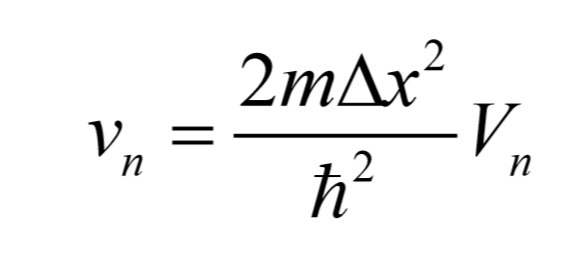

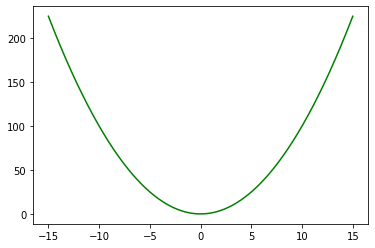

In [230]:
v = V(x)#*2*dx**2
plt.plot(x, v, color="green", label="V(x)")      
#plt.plot(x, V(x), color="green", label="V(x)")      
plt.show()

In [259]:
# построение матрицы Гамильтона
h = np.zeros((S,S))
for i in range(S-1):
    h[i+1][i] = -1*k
    h[i][i+1] = -1*k
for i in range(S):
    h[i][i] = 2*k + v[i]
#h[S-1][S-1]
print("1й, 2й и последний элементы диагонали:", h[0][0],h[1][1],h[-1][-1])

1й, 2й и последний элементы диагонали: 28024.824552386875 28024.644696307718 28024.824552386875


In [161]:
eigvals, eigvecs = np.linalg.eigh(h)

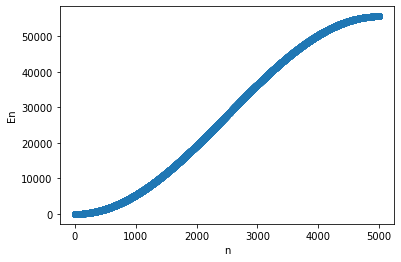

In [162]:
# построение зависимости энергии от номера уровня
plt.plot(np.sort(eigvals),'o')
plt.xlabel("n")
plt.ylabel("En")
plt.show()
 

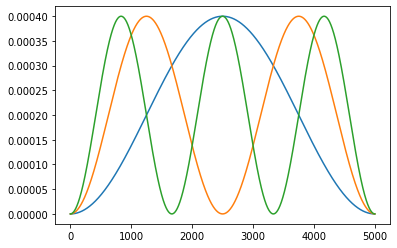

In [260]:
# несколько первых квадратов функций
plt.plot(eigvecs[0]**2)
plt.plot(eigvecs[1]**2)
plt.plot(eigvecs[2]**2)
plt.show()

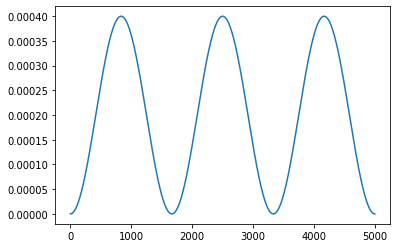

In [246]:
eigx = eigvecs[2]**2#/dx
plt.plot(eigx)
plt.show() 

## Алгоритм находит уже нормированный вектор, поэтому $\psi[i]$ - вероятность обнаружения частицы в точке с индексом i

In [261]:
# проверка нормировки
for i in range(6):
    print ("phi^2",i, "=",sum([eigvecs[i][j]**2 for j in range(S)]))
    #print (sum([eigvecs[i][j] for j in range(S)]))

phi^2 0 = 0.9999999999999994
phi^2 1 = 1.0000000000000013
phi^2 2 = 1.0000000000000004
phi^2 3 = 0.9999999999999992
phi^2 4 = 0.9999999999999996
phi^2 5 = 1.0000000000000009


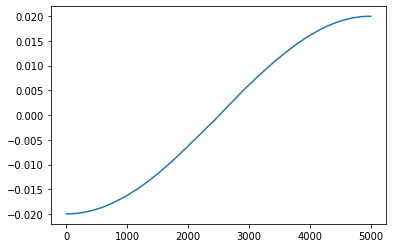

In [262]:
# отсортированный вектор основного состояния
plt.plot(np.sort(eigvecs[0]))
plt.show()

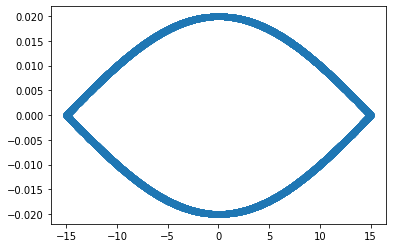

In [263]:
# неотсортированный вектор основного состояния
plt.plot(x,eigvecs[0],'o')
plt.show()

In [264]:
eigvals[40] # надо следить, чтобы En<<Vmax, иначе не выполняется условие равентсва 0 волновой функции на концах

9.225685005734496

## Проверить эквидистантность: получить новый массив, элементы которого - разность данного значения энергии с предыдущим
Построить график

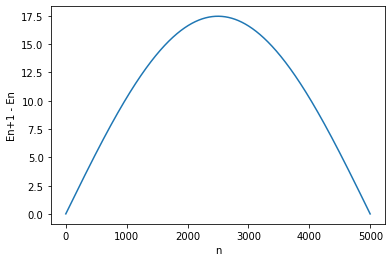

In [265]:
vals = np.sort(eigvals)
dist = [vals[i+1]-vals[i] for i in range(len(vals)-1)]
#dist
plt.plot(dist)
plt.xlabel("n")
plt.ylabel("En+1 - En")
plt.show()

### эквидистантности явно нет

## сравнение с аналитическими волновыми функциями
# $\omega = \sqrt2$
# $\psi_0=\left(\frac{m\omega}{\pi\hbar}\right)^\frac{1}{4}e^{-\frac{m\omega x^2}{2\hbar}} = \frac{1}{\sqrt{a\sqrt{\pi}}}e^{-\frac{x^2}{2a^2}}$


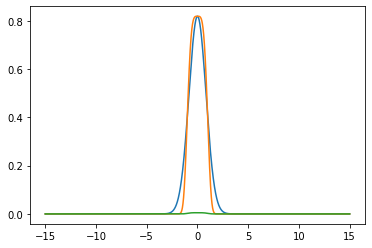

In [273]:
# тут надо подумать какую частоту брать. по идее, она определяется видом потенциала (mw^2/2 = 1, при m = 1 дает w = 2^0.5),
#а также равна удвоенной энергии, 
# если по свойcтвам потенциала
w = math.sqrt(2) #eigvals[0]*2'
a = 1/math.sqrt(w)
pi = math.pi
sqrtpi = math.sqrt(pi)
def psi0(x):
    return math.sqrt(a*sqrtpi)**(-1)*math.e**(-x**2/(2*a**2))
def psi0_2(x):
    return psi0(x**2)
plt.plot(x,psi0(x))
plt.plot(x,psi0_2(x))
plt.plot(x, psi0_2(x)*dx) #нижний график это список psi0(x[i])*dx
plt.show()

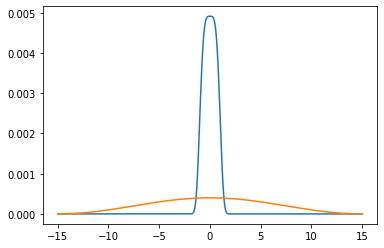

In [272]:
# график численной и аналитической функций, аналитическая слышком высоко
plt.plot(x, psi0_2(x)*dx)
plt.plot(x, eigvecs[0]**2)
plt.show()

In [274]:
print ("численный интеграл квадрата аналитической функции = ", sum([psi0(x[i])**2*dx for i in range(S)]))

численный интеграл квадрата аналитической функции =  0.9997999999999995


## $\psi_1 = \frac{1}{\sqrt{2a\sqrt{\pi}}}\frac{2x}{a}e^{-\frac{x^2}{2a^2}}$


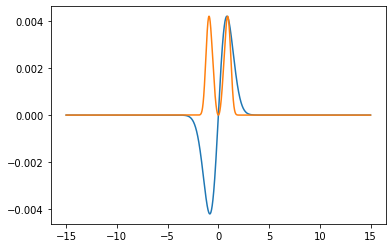

In [278]:
def psi1(x):
    return psi0(x)*math.sqrt(2)*x/a
def psi1_2(x):
    return psi1(x**2)
plt.plot(x,psi1(x)*dx)
#plt.plot(x, eigvecs[1],'o')
plt.plot(x,psi1_2(x)*dx)
#plt.plot(x, psi1_2(x)*dx)
plt.show()

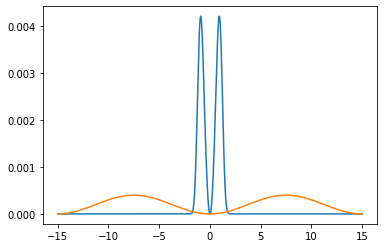

In [288]:
plt.plot(x, psi1_2(x)*dx)
plt.plot(x,eigvecs[1]**2)
plt.show()

## Проверка волновой функции с n >> 1

In [241]:
n =100
eigvals[n]

55.94223926663021

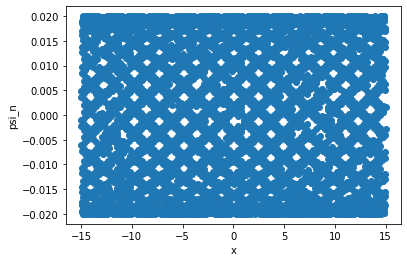

In [243]:
plt.plot(x,eigvecs[n],'o')
plt.xlabel("x")
plt.ylabel("psi_n")
plt.show()

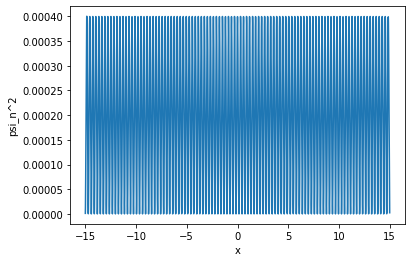

In [245]:
plt.plot(x,eigvecs[n]**2)#,'o')
plt.xlabel("x")
plt.ylabel("psi_n^2")
plt.show()